<a href="https://colab.research.google.com/github/deepenmi/pyTorchPractice/blob/master/ImageRecognition_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch torchvision

In [0]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F


In [4]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
                                ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

0it [00:00, ?it/s]

9920512it [00:05, 1799595.45it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 289041.52it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 5235781.51it/s]                           
8192it [00:00, 121946.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

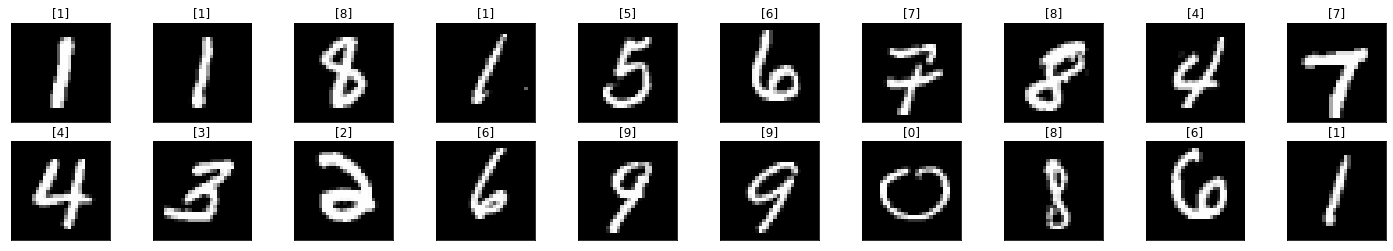

In [6]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x



In [8]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [10]:
epochs = 12
running_loss_history = []
running_corrects_history = []

val_running_loss_history=[]
val_running_corrects_history=[]

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  print(e)
  for inputs, labels in training_loader:
    
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    running_loss+=loss.item()
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        val_running_loss+=val_loss.item()

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float() / len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float() / len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print('training loss: {:.4f}, accuracy: {:.4f}'.format(epoch_loss, epoch_acc.item())) 
    print('Validation loss: {:.4f}, accuracy: {:.4f}'.format(val_epoch_loss, val_epoch_acc.item())) 


0
training loss: 0.9486, accuracy: 75.8350
Validation loss: 0.4280, accuracy: 88.4800
1
training loss: 0.3785, accuracy: 89.3000
Validation loss: 0.3238, accuracy: 90.9200
2
training loss: 0.3198, accuracy: 90.6817
Validation loss: 0.2949, accuracy: 91.5800
3
training loss: 0.2930, accuracy: 91.4867
Validation loss: 0.2676, accuracy: 92.2300
4
training loss: 0.2694, accuracy: 92.1283
Validation loss: 0.2496, accuracy: 92.8700
5
training loss: 0.2475, accuracy: 92.7900
Validation loss: 0.2340, accuracy: 93.3600
6
training loss: 0.2275, accuracy: 93.4033
Validation loss: 0.2230, accuracy: 93.5300
7
training loss: 0.2111, accuracy: 93.8833
Validation loss: 0.1991, accuracy: 94.2900
8
training loss: 0.1960, accuracy: 94.3533
Validation loss: 0.1879, accuracy: 94.5000
9
training loss: 0.1827, accuracy: 94.6633
Validation loss: 0.1787, accuracy: 94.8100
10
training loss: 0.1720, accuracy: 95.0200
Validation loss: 0.1683, accuracy: 95.1000
11
training loss: 0.1611, accuracy: 95.3617
Validatio

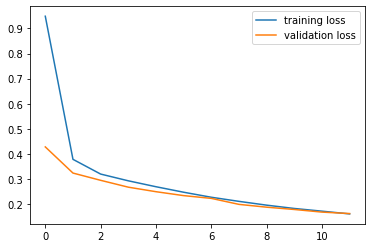

In [11]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history,label='validation loss')
plt.legend()

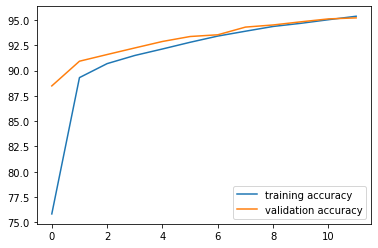

In [12]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history,label='validation accuracy')
plt.legend()

In [13]:
!pip3 install pillow==4.3.0

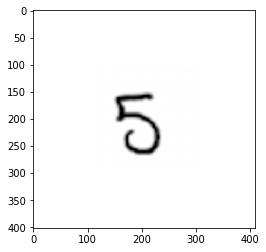

In [14]:
import requests
from PIL import Image
import PIL.ImageOps
#url = ''
#response = request.get(url, stream = True)
#img = Image.open(response.raw)
#print(response)

img = Image.open("/content/5.png")
plt.imshow(img)



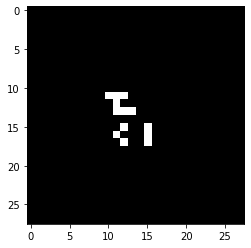

In [15]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

# Random test 1

In [51]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
if pred.item()==5:
  print(" Prediction:\033[1;32;47m {} - Classified Correctly".format(pred.item()))
else:
  print(" Prediction:\033[1;31;47m {} - Classified Inorrectly".format(pred.item()))


 Prediction: 4 - Classified Inorrectly


# Random Test 2

 Prediction: 7 - Classified Correctly


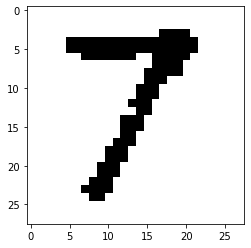

In [50]:

img2 = Image.open("/content/7.png")
plt.imshow(img2)

#img2 = PIL.ImageOps.invert(img2)
img2 = img2.convert('1')
img2 = transform(img2)
plt.imshow(im_convert(img2))


img2 = img2.view(img2.shape[0], -1)
output = model(img2)
_, pred = torch.max(output, 1)
if pred.item()==7:
  print(" Prediction:\033[1;32;47m {} - Classified Correctly".format(pred.item()))
else:
  print(" Prediction:\033[1;31;47m {} - Classified Inorrectly".format(pred.item()))

# Random Test 3


 Prediction: 5 - Classified Inorrectly


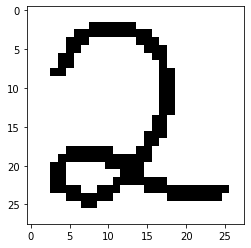

In [49]:
img2 = Image.open("/content/2.png")
plt.imshow(img2)

#img2 = PIL.ImageOps.invert(img2)
img2 = img2.convert('1')
img2 = transform(img2)
plt.imshow(im_convert(img2))


img2 = img2.view(img2.shape[0], -1)
output = model(img2)
_, pred = torch.max(output, 1)
if pred.item()==2:
  print(" Prediction:\033[1;32;47m {} - Classified Correctly".format(pred.item()))
else:
  print(" Prediction:\033[1;31;47m {} - Classified Inorrectly".format(pred.item()))

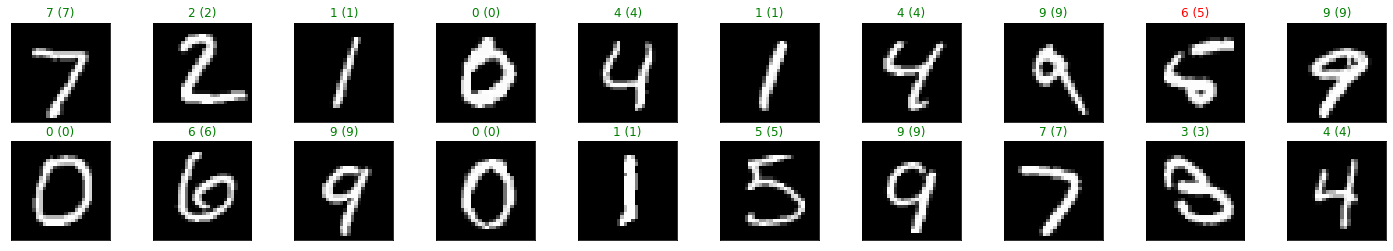

In [22]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
outputs = model(images_)
_, preds = torch.max(outputs,1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))


